In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cf
import netCDF4
import pandas as pd
import datetime
import pytz 
from tzwhere import tzwhere
import math
from suntime import Sun
import scipy as sci
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import cdo
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
def get_data(len_data, NU_WU):  #len_data is the number of files i want to read in (e.g. 4 for 4h hourly data), NU_WU is a str and you can define if you want 'with urban' or 'no urban'
    ds_data = {}  
    for i in range(1, len_data + 1):
        filename = f'../det_data_all_2021/fc_DOM01_0{i:03d}_{NU_WU}_urban_grid.nc'
        try:
            ds_data[i] = xr.open_dataset(filename)
 #           print(f'Successfully opened {filename}')
        except FileNotFoundError:
            print(f'File not found: {filename}')
        except Exception as e:
            print(f'An error occurred while opening {filename}: {e}')
    
    return ds_data

def get_data_ens(len_data, NU_WU, mem):
    ds_data = {}  
    for i in range(1, len_data + 1):
        filename = f'../ensemble_members_data_2021/{mem}/fc_DOM01_0{i:03d}_{mem}_{NU_WU}_urban_grid.nc'
        try:
            ds_data[i] = xr.open_dataset(filename)
#            print(f'Successfully opened {filename}')
        except FileNotFoundError:
            print(f'File not found: {filename}')
        except Exception as e:
            print(f'An error occurred while opening {filename}: {e}')
    
    return ds_data

def get_data_nights(len_data, NU_WU):  #len_data is the number of files i want to read in (e.g. 4 for 4h hourly data), NU_WU is a str and you can define if you want 'with urban' or 'no urban'
    ds_data = {}  
    for i in range(1, len_data + 1):
        filename = f'../det_data_nights_2021/fc_DOM01_0{i:03d}_{NU_WU}_urban_grid_nights.nc'
        try:
            ds_data[i] = xr.open_dataset(filename)
#            print(f'Successfully opened {filename}')
        except FileNotFoundError:
            print(f'File not found: {filename}')
        except Exception as e:
            print(f'An error occurred while opening {filename}: {e}')
    
    return ds_data

def get_data_nights_ens(len_data, NU_WU, mem):  #len_data is the number of files i want to read in (e.g. 4 for 4h hourly data), NU_WU is a str and you can define if you want 'with urban' or 'no urban'
    ds_data = {}  
    for i in range(1, len_data + 1):
        filename = f'../ensemble_members_nights_2021/{mem}/fc_DOM01_0{i:03d}_{mem}_{NU_WU}_urban_grid_nights.nc'
        try:
            ds_data[i] = xr.open_dataset(filename)
#            print(f'Successfully opened {filename}')
        except FileNotFoundError:
            print(f'File not found: {filename}')
        except Exception as e:
            print(f'An error occurred while opening {filename}: {e}')
    
    return ds_data

def get_data_days(len_data, NU_WU):  #len_data is the number of files i want to read in (e.g. 4 for 4h hourly data), NU_WU is a str and you can define if you want 'with urban' or 'no urban'
    ds_data = {}  
    for i in range(1, len_data + 1):
        filename = f'../det_data_day_2021/fc_DOM01_0{i:03d}_{NU_WU}_urban_grid_days.nc'
        try:
            ds_data[i] = xr.open_dataset(filename)
#            print(f'Successfully opened {filename}')
        except FileNotFoundError:
            print(f'File not found: {filename}')
        except Exception as e:
            print(f'An error occurred while opening {filename}: {e}')
    
    return ds_data

def get_data_days_ens(len_data, NU_WU, mem):  #len_data is the number of files i want to read in (e.g. 4 for 4h hourly data), NU_WU is a str and you can define if you want 'with urban' or 'no urban'
    ds_data = {}  
    for i in range(1, len_data + 1):
        filename = f'../ensemble_members_days_2021/{mem}/fc_DOM01_0{i:03d}_{mem}_{NU_WU}_urban_grid_days.nc'
        try:
            ds_data[i] = xr.open_dataset(filename)
#            print(f'Successfully opened {filename}')
        except FileNotFoundError:
            print(f'File not found: {filename}')
        except Exception as e:
            print(f'An error occurred while opening {filename}: {e}')
    
    return ds_data

def get_variable_1d(len_data, data, variable, height_level, hour): #data is the output of 'get_data', variable is e.g. 'T' (as str), height_level (mostly 1 for urban), hour is time in this case 0 because one file only has one timestep
    ds_data = {}
    for i in range(1, len_data + 1):
        ds_data[i] = data[i][f'{variable}'].isel(time = hour, height_2 = height_level)
    
    return ds_data

In [3]:
data_WU_det = get_data(120, 'WU')
data_NU_det = get_data(120, 'NU')

In [4]:
mem_ids = ['mem001', 'mem002', 'mem003', 'mem004', 'mem005' , 'mem006', 'mem007', 'mem008', 'mem009', 'mem010',
          'mem011', 'mem012', 'mem013', 'mem014', 'mem015', 'mem016', 'mem017', 'mem018', 'mem019', 'mem020']

data_NU_mem = {}

for mem_id in mem_ids:
    data_NU_mem[mem_id] = get_data_ens(120, 'NU', mem_id)

In [6]:
data_WU_mem = {}

for mem_id in mem_ids:
    data_WU_mem[mem_id] = get_data_ens(120, 'WU', mem_id)

In [43]:
T_2M_WU_det = get_variable_1d(119, data_WU_det, 'T_2M', 0 , 0)
T_2M_NU_det = get_variable_1d(119, data_NU_det, 'T_2M', 0 , 0)

In [8]:
T_2M_WU_mem = {}
T_2M_NU_mem = {}

for mem_id in mem_ids:
    T_2M_WU_mem[mem_id] = get_variable_1d(120, data_WU_mem[mem_id], 'T_2M', 0 , 0)

for mem_id in mem_ids:
    T_2M_NU_mem[mem_id] = get_variable_1d(120, data_NU_mem[mem_id], 'T_2M', 0 , 0)

In [9]:
T_2M_WU_cEU_det= {}
T_2M_NU_cEU_det = {}

for i in range(1,120):
    T_2M_WU_cEU_det[i] = T_2M_WU_det[i].where(
    (T_2M_WU_det[i]['clon'] >= 0.10472) &
    (T_2M_WU_det[i]['clon'] <= 0.418879) &
    (T_2M_WU_det[i]['clat'] >= 0.8030) &
    (T_2M_WU_det[i]['clat'] <= 0.959931),
    drop=True
)
    
for i in range(1,120):
    T_2M_NU_cEU_det[i] = T_2M_NU_det[i].where(
    (T_2M_NU_det[i]['clon'] >= 0.10472) &
    (T_2M_NU_det[i]['clon'] <= 0.418879) &
    (T_2M_NU_det[i]['clat'] >= 0.8030) &
    (T_2M_NU_det[i]['clat'] <= 0.959931),
    drop=True
)

In [11]:
T_2M_WU_cEU_mem = {}

for mem_id in mem_ids:
    T_2M_WU_cEU_mem[mem_id] = {}
    for i in range(1, 120):
        T_2M_WU_cEU_mem[mem_id][i] = T_2M_WU_mem[mem_id][i].where(
            (T_2M_WU_mem[mem_id][i]['clon'] >= 0.10472) &
            (T_2M_WU_mem[mem_id][i]['clon'] <= 0.418879) &
            (T_2M_WU_mem[mem_id][i]['clat'] >= 0.8030) &
            (T_2M_WU_mem[mem_id][i]['clat'] <= 0.959931),
             drop=True
        )

T_2M_NU_cEU_mem = {}

for mem_id in mem_ids:
    T_2M_NU_cEU_mem[mem_id] = {}
    for i in range(1, 120):
        T_2M_NU_cEU_mem[mem_id][i] = T_2M_NU_mem[mem_id][i].where(
            (T_2M_NU_mem[mem_id][i]['clon'] >= 0.10472) &
            (T_2M_NU_mem[mem_id][i]['clon'] <= 0.418879) &
            (T_2M_NU_mem[mem_id][i]['clat'] >= 0.8030) &
            (T_2M_NU_mem[mem_id][i]['clat'] <= 0.959931),
            drop=True
        )

In [12]:
T_2M_WU_cEU_dim_hour_det = xr.concat(list(zip(*T_2M_WU_cEU_det.items()))[1], dim = 'hour')
T_2M_NU_cEU_dim_hour_det = xr.concat(list(zip(*T_2M_NU_cEU_det.items()))[1], dim = 'hour')

In [14]:
T_2M_WU_cEU_dim_hour_mem = {}
T_2M_NU_cEU_dim_hour_mem = {}

for mem_id in mem_ids:
    T_2M_WU_cEU_dim_hour_mem[mem_id] = xr.concat(list(zip(*T_2M_WU_cEU_mem[mem_id].items()))[1], dim = 'hour')

for mem_id in mem_ids:
    T_2M_NU_cEU_dim_hour_mem[mem_id] = xr.concat(list(zip(*T_2M_NU_cEU_mem[mem_id].items()))[1], dim = 'hour')

In [15]:
all_values = []
mean_over_mem_NU_cell = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_NU_cEU_dim_hour_mem[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    mean_over_mem_NU_cell[cell] = np.median(all_values_array, axis=0)
    all_values = []  

In [16]:
all_values = []
mean_over_mem_WU_cell = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_WU_cEU_dim_hour_mem[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    mean_over_mem_WU_cell[cell] = np.median(all_values_array, axis=0)
    all_values = [] 

In [17]:
all_values = []
std_over_mem_NU_cell = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_NU_cEU_dim_hour_mem[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    std_over_mem_NU_cell[cell] = np.std(all_values_array, axis=0)
    all_values = []  

In [18]:
all_values = []
std_over_mem_WU_cell = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_WU_cEU_dim_hour_mem[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    std_over_mem_WU_cell[cell] = np.std(all_values_array, axis=0)
    all_values = [] 

In [19]:
all_values = []
max_over_mem_WU_cell = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_WU_cEU_dim_hour_mem[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    max_over_mem_WU_cell[cell] = np.max(all_values_array, axis=0)
    all_values = [] 

In [20]:
all_values = []
max_over_mem_NU_cell = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_NU_cEU_dim_hour_mem[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    max_over_mem_NU_cell[cell] = np.max(all_values_array, axis=0)
    all_values = [] 

In [21]:
all_values = []
min_over_mem_WU_cell = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_WU_cEU_dim_hour_mem[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    min_over_mem_WU_cell[cell] = np.min(all_values_array, axis=0)
    all_values = [] 

In [22]:
all_values = []
min_over_mem_NU_cell = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_NU_cEU_dim_hour_mem[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    min_over_mem_NU_cell[cell] = np.min(all_values_array, axis=0)
    all_values = [] 

In [23]:
sns.set_style("whitegrid")

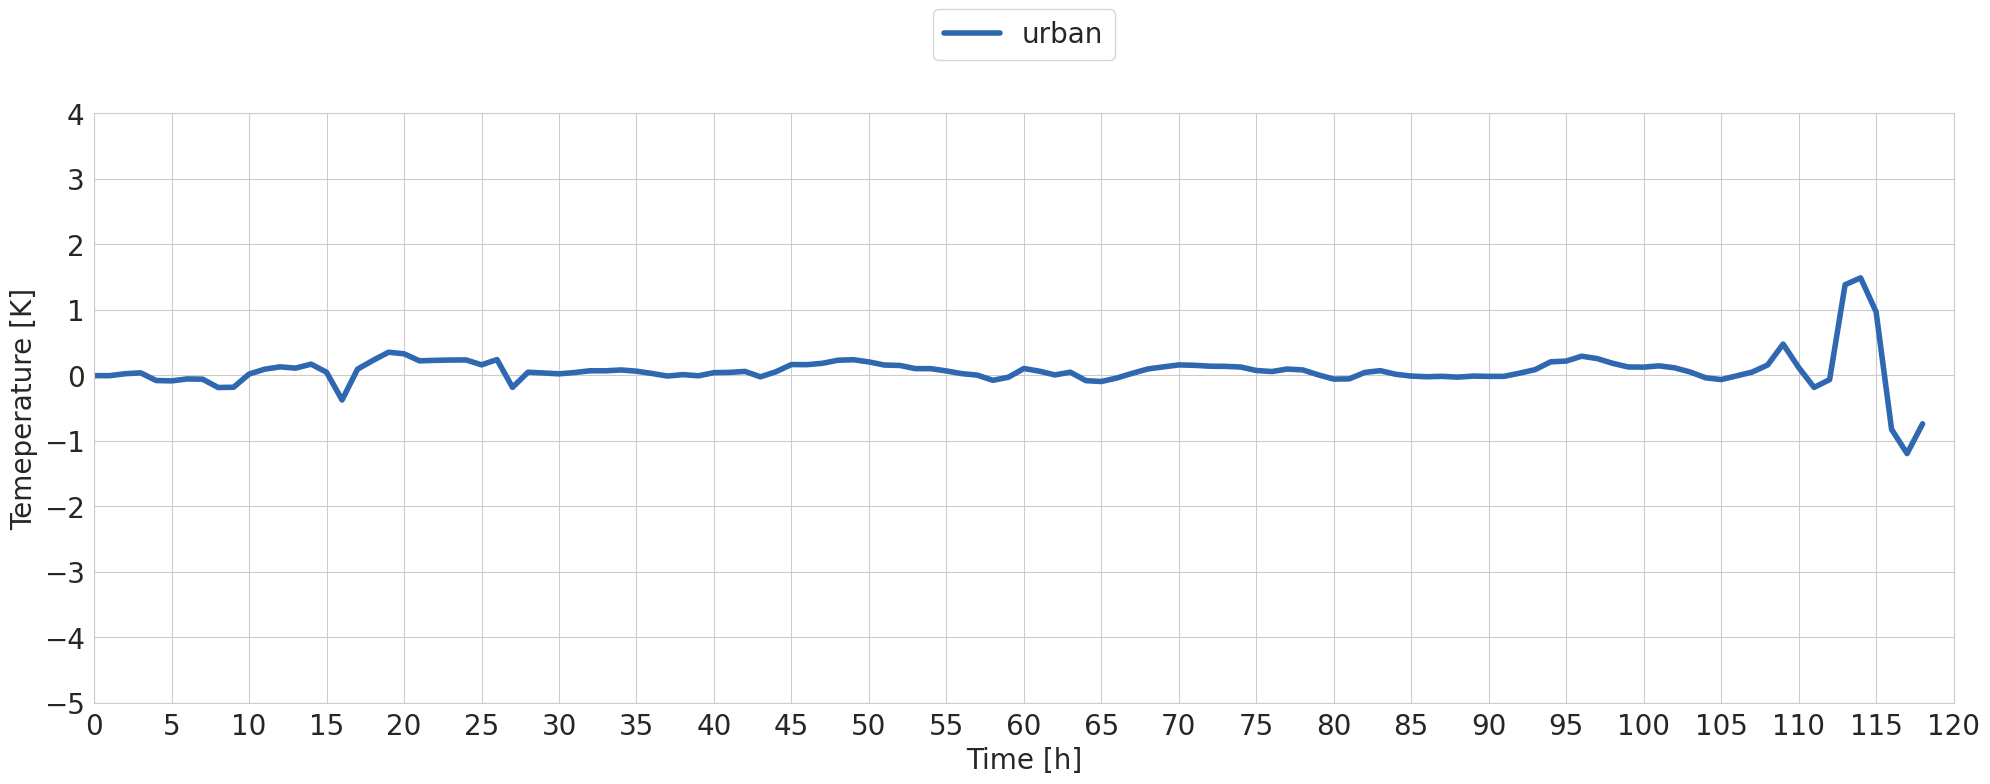

In [24]:
x = 1

fig, axes = plt.subplots(figsize=(20,8))

axes.plot(T_2M_WU_cEU_dim_hour_det.isel(cell=x).values - T_2M_NU_cEU_dim_hour_det.isel(cell=x).values  , color='#2F67B1', linewidth=4, 
          label = 'urban')

#axes.axhline(y=0, color='black', linestyle='-')
x_values = np.arange(0, 125, 5)
plt.xlim(x_values[0], x_values[-1])
plt.xticks(x_values, fontsize = 20)

y_values = np.arange(-5, 5, 1)
plt.yticks(y_values, fontsize = 20)

plt.ylabel('Temeperature [K]', size = 20)
plt.xlabel('Time [h]', size = 20)


axes.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', fontsize = 20)
plt.tight_layout()
#plt.savefig('../plots_2024/cEU_lineplot_ensemble_NU_WU_Berlin_2022.jpeg')
plt.show()

## Atempting a autocorrelation

In [25]:
auto_cov = {}

auto_cov['Berlin'] = sm.tsa.stattools.acovf(T_2M_WU_cEU_dim_hour_det.isel(cell=0) - T_2M_NU_cEU_dim_hour_det.isel(cell=0) ,demean=True,adjusted=False,fft=True)
auto_cov['Warsaw'] = sm.tsa.stattools.acovf(T_2M_WU_cEU_dim_hour_det.isel(cell=1) - T_2M_NU_cEU_dim_hour_det.isel(cell=1) ,demean=True,adjusted=False,fft=True)
auto_cov['Budapest'] = sm.tsa.stattools.acovf(T_2M_WU_cEU_dim_hour_det.isel(cell=2) - T_2M_NU_cEU_dim_hour_det.isel(cell=2) ,demean=True,adjusted=False,fft=True)


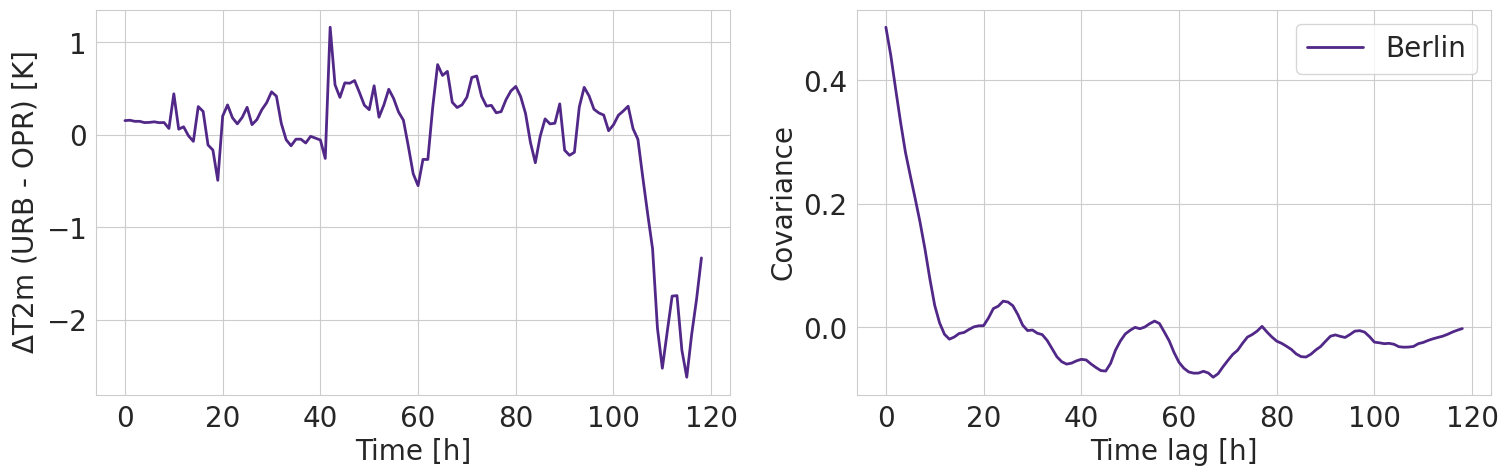

In [26]:
fig,axes = plt.subplots(1,2,figsize=(18,5)) 
colors = plt.cm.rainbow(np.linspace(0, 1, 3))

#ort = ['Berlin', 'Warsaw', 'Budapest']
ort = ['Berlin']

for i in range(1):
    axes[0].plot(T_2M_WU_cEU_dim_hour_det.isel(cell=i).values - T_2M_NU_cEU_dim_hour_det.isel(cell=i).values,
                 label='urban - operational', color= '#512888', linewidth = 2)

axes[0].set_ylabel('$\Delta$T2m (URB - OPR) [K]', fontsize = 20)
axes[0].set_xlabel('Time [h]', fontsize = 20)
axes[0].tick_params(axis='y', labelsize=20)
axes[0].tick_params(axis='x', labelsize=20)


for i, city in enumerate(ort):
    axes[1].plot(auto_cov[city], color= '#512888', label=city, linewidth = 2)

axes[1].set_ylabel('Covariance', fontsize = 20)
axes[1].set_xlabel('Time lag [h]', fontsize = 20)
axes[1].legend(fontsize = 20)
axes[1].tick_params(axis='y', labelsize=20)
axes[1].tick_params(axis='x', labelsize=20)


plt.savefig('../plots_2024/cEU_autocovariance_2021_Berlin.jpeg')


Die Autokovarianz zeigt wie sich die Differenz der beiden Simulationen im Laufe der Zeit ändert 
hohe Werte zeigen, dass scich etwas wiederholt, weil wir hier alle 24h einen peak haben, zeigt das einen ausgeprägten Tagesgang

der exponentielle Abfall kommt daher, dass sich die Wellen unterscheiden und deswegen einfach eine geringere Kovarianz zwischen den beiden Zeitabschnitten ist. Es ist also ein physikalischer Grund und kein mathematischer!!

## Plotting Ensemble + Deterministic Simulation

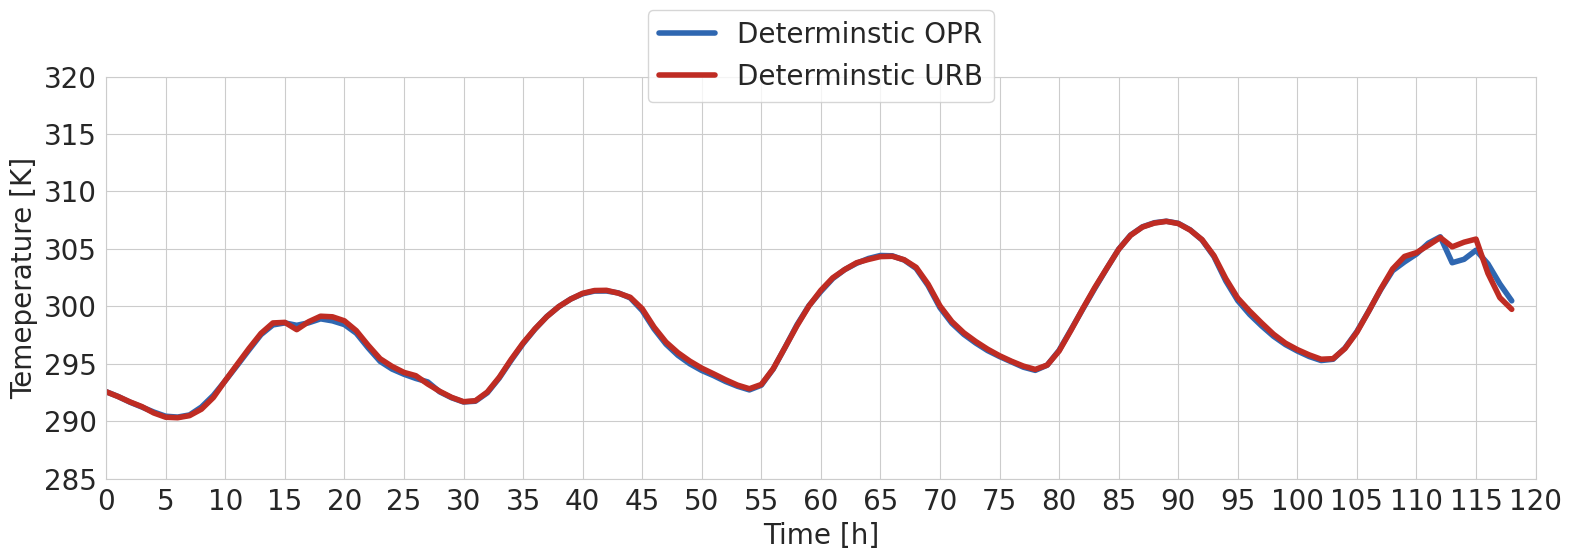

In [38]:
x = 1

fig, axes = plt.subplots(figsize=(16,6))

#axes.fill_between(range(len(mean_over_mem_NU_cell[x])),
#                 max_over_mem_NU_cell[x], min_over_mem_NU_cell[x], alpha = .3, color = '#2F67B1', 
#                label = 'Ensemble spread OPR')

#axes.fill_between(range(len(mean_over_mem_WU_cell[x])),
#                 max_over_mem_WU_cell[x] , min_over_mem_WU_cell[x], alpha = .3, color = '#BF2C23',
#                label = 'Ensemble spread URB')

#for mem_id in mem_ids:
#    axes.plot(T_2M_WU_sEU_dim_hour_mem[mem_id].isel(cell=x).values, color='#BF2C23', alpha=0.4, linewidth=0.5, ls = 'dotted')

#for mem_id in mem_ids:
#    axes.plot(T_2M_NU_sEU_dim_hour_mem[mem_id].isel(cell=0).values, color='#2F67B1', alpha=0.4, linewidth=0.5, ls = 'dashed')



axes.plot(T_2M_NU_cEU_dim_hour_det.isel(cell=x).values, color='#2F67B1', linewidth=4, 
          label = 'Determinstic OPR')
axes.plot(T_2M_WU_cEU_dim_hour_det.isel(cell=x).values, color='#BF2C23', linewidth=4, 
         label='Determinstic URB')

x_values = np.arange(0, 121, 5)
plt.xlim(x_values[0], x_values[-1])
plt.xticks(x_values, fontsize = 20)

y_values = np.arange(285, 325, 5)
plt.yticks(y_values, fontsize = 20)

plt.yticks(fontsize = 20)


plt.ylabel('Temeperature [K]', size = 20)
plt.xlabel('Time [h]', size = 20)


axes.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', fontsize = 20)
plt.tight_layout()
#plt.savefig('../plots_2024/cEU_lineplot_ensemble_NU_Warsaw_2021.jpeg')
plt.savefig('../plots_2024/cEU_lineplot_Warsaw_2021.jpeg')
plt.show()


## Combining Budapest Ensemble + Determinstic Simulation

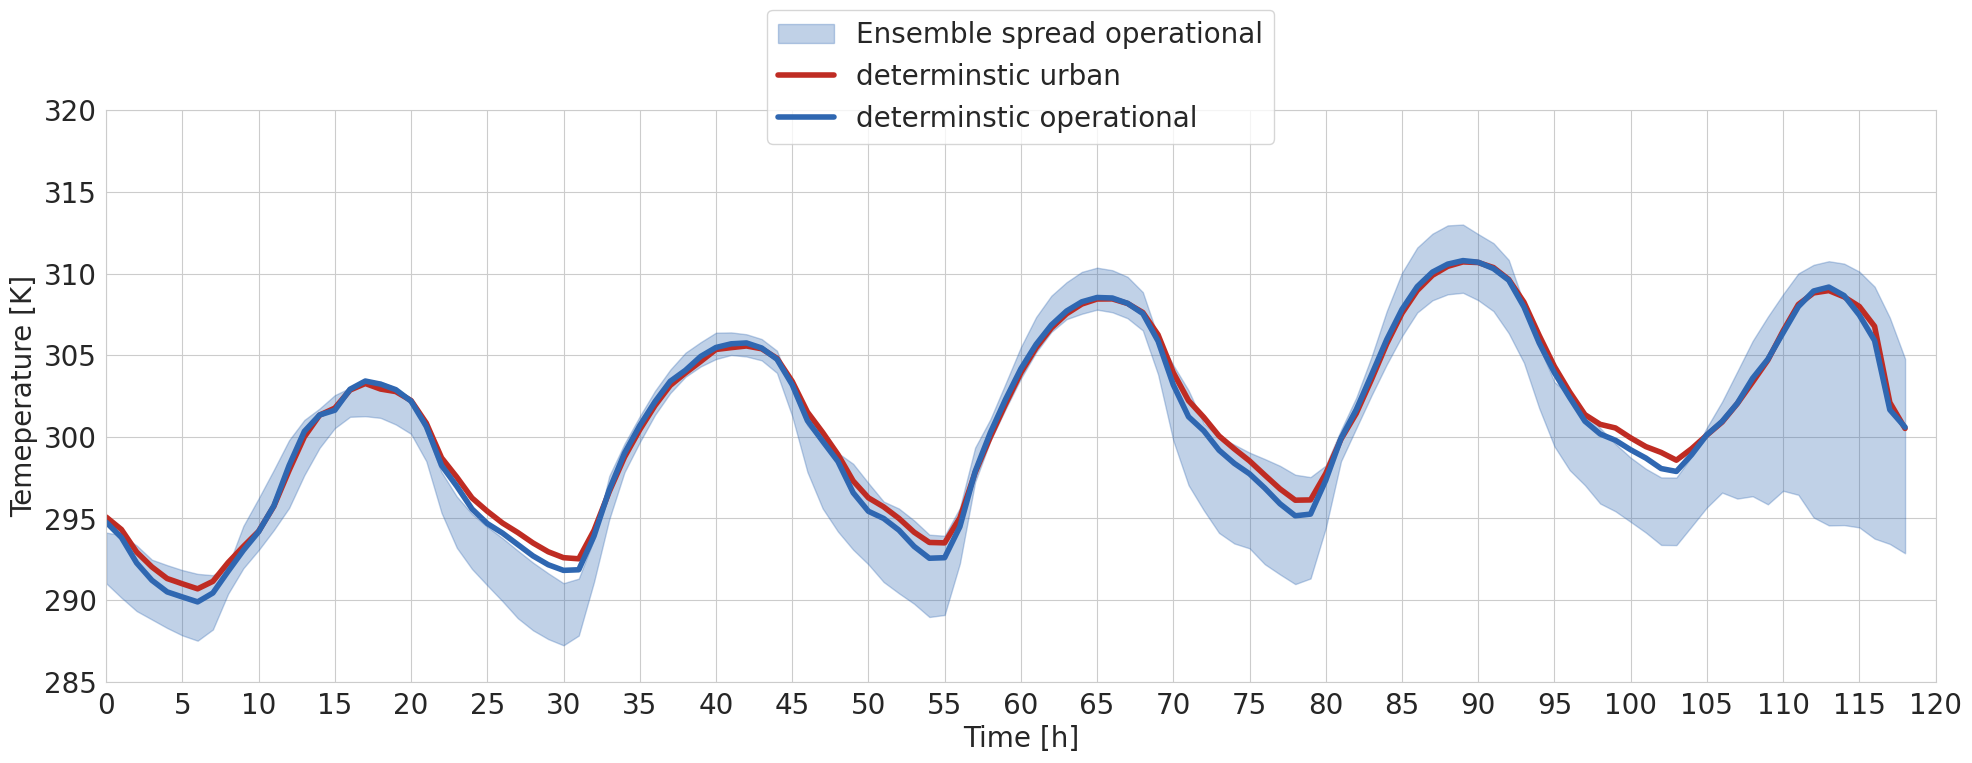

In [46]:
#combining the budapest plots 

plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(figsize=(20,8))


#for mem_id in mem_ids:
#    axes.plot(T_2M_WU_sEU_dim_hour_mem[mem_id].isel(cell=0).values, color='#DB1048', alpha=0.4, linewidth=0.5, ls = 'dotted')

#plt.fill_between(range(len(mean_over_mem_WU_cell[x])),
#                 (max_over_mem_WU_cell[2] + max_over_mem_WU_cell[3])/2 ,
#                 (min_over_mem_WU_cell[2] + min_over_mem_WU_cell[3])/2, alpha = .3, color = '#BF2C23',
#                label = 'Ensemble spread urban')

#for mem_id in mem_ids:
#    axes.plot(T_2M_NU_sEU_dim_hour_mem[mem_id].isel(cell=0).values, color='#F4B301', alpha=0.4, linewidth=0.5, ls = 'dashed')

plt.fill_between(range(len(mean_over_mem_NU_cell[x])),
                 (max_over_mem_NU_cell[2] + max_over_mem_NU_cell[3])/2,
                 (min_over_mem_NU_cell[2] + min_over_mem_NU_cell[3])/2, alpha = .3, color = '#2F67B1', 
                label = 'Ensemble spread operational')

plt.plot((T_2M_WU_cEU_dim_hour_det.isel(cell=2).values + T_2M_WU_cEU_dim_hour_det.isel(cell=3).values)/2,
         color='#BF2C23', linewidth=4, label='determinstic urban')
plt.plot((T_2M_NU_cEU_dim_hour_det.isel(cell=2).values + T_2M_NU_cEU_dim_hour_det.isel(cell=3).values)/2, 
         color='#2F67B1', linewidth=4, label = 'determinstic operational')


x_values = np.arange(0, 121, 5)
plt.xlim(x_values[0], x_values[-1])
plt.xticks(x_values, fontsize = 20)

y_values = np.arange(285, 325, 5)
plt.yticks(y_values, fontsize = 20)
plt.ylabel('Temeperature [K]', fontsize = 20)
plt.xlabel('Time [h]', fontsize = 20)
plt.legend()
axes.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', fontsize = 20)
plt.tight_layout()
plt.savefig('../plots_2024/cEU_lineplot_ensemble_NU_Budapest_combined_2021.jpeg')
#plt.savefig('../plots_2024/cEU_lineplot_Budapest_combined_2021.jpeg')
plt.show()